In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "Images"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

ISIC_0000001.jpg
ISIC_0000002.jpg
ISIC_0000003.jpg
ISIC_0000004.jpg
ISIC_0000005.jpg
ISIC_0000006.jpg
ISIC_0000007.jpg
ISIC_0000008.jpg
ISIC_0000009.jpg
ISIC_0000010.jpg
ISIC_0000020.jpg
delete
test
train



In [2]:
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep

Working with 11 images
Image examples: 
ISIC_0000004.jpg


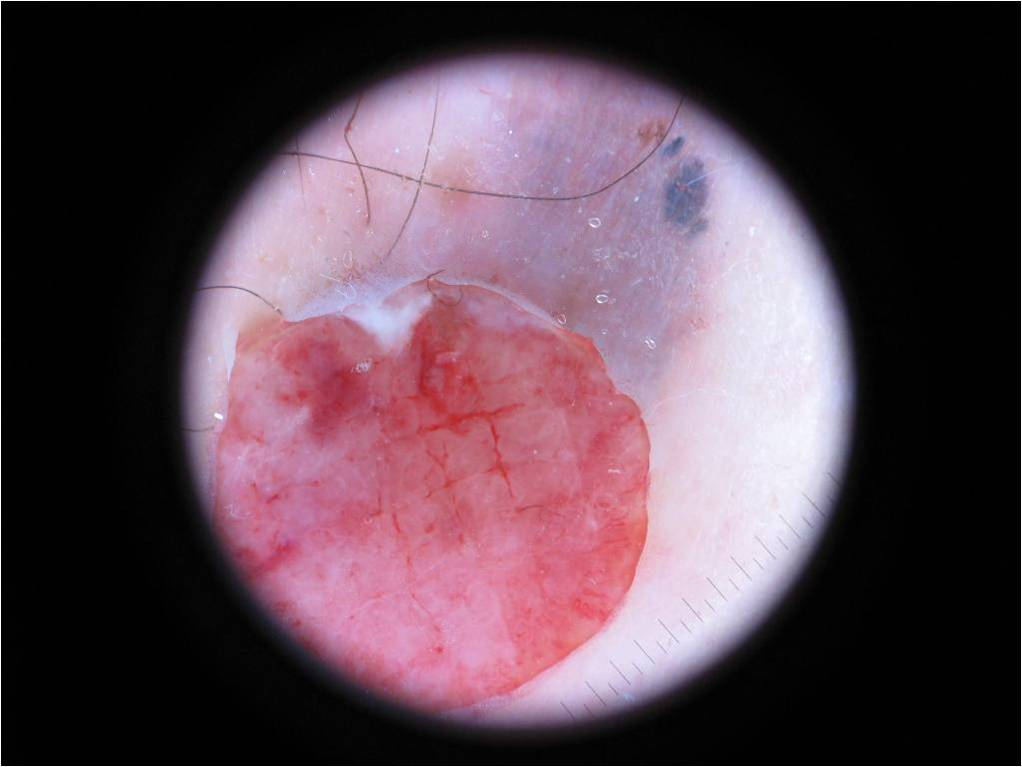

ISIC_0000010.jpg


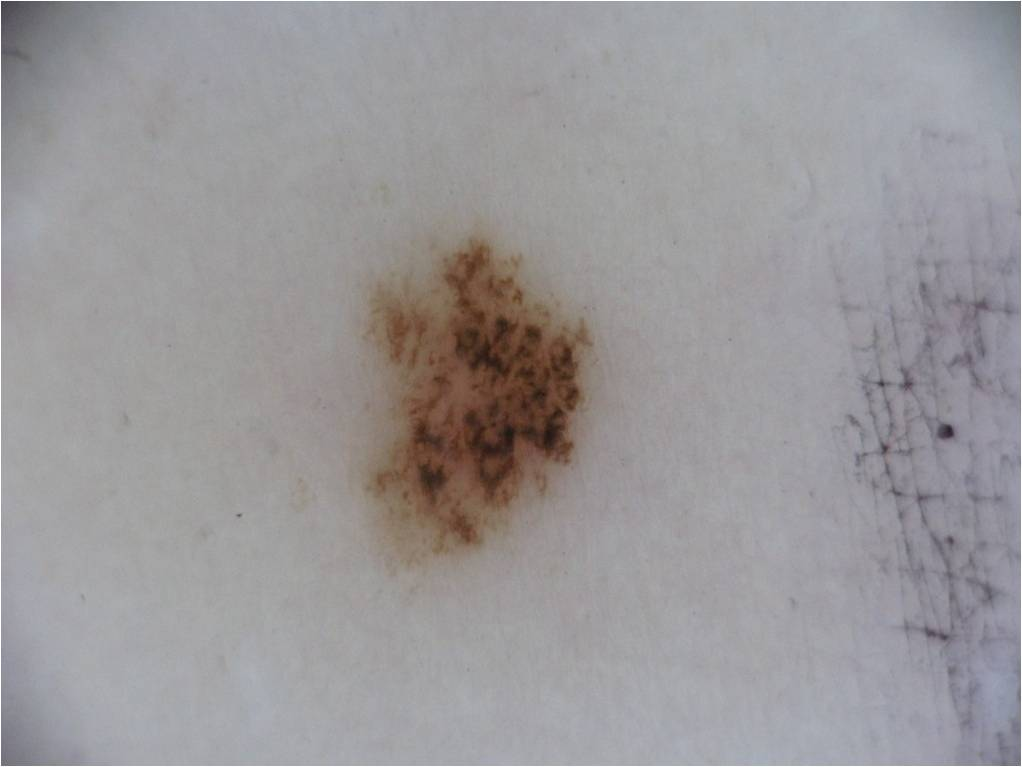

In [3]:
folder = "Images"

onlyfiles = [f for f in os.listdir(folder) if (os.path.isfile(os.path.join(folder, f)) and f.endswith(".jpg") )]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

for i in range(3, 5):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=240, height=320))

In [4]:
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_files = []
y_train = []
dataset=[]

i=0
for _file in onlyfiles:
    fpath=os.path.join("Images", _file)
    im=Image.open(fpath)
    np_im = np.array(im)
   
    dataset.append(np_im)
    
    
    train_files.append(_file)
    label_in_file = _file.find("_")
    y_train.append(_file[0:label_in_file])
    i=i+1
    
print("Files in train_files: %d" % len(train_files))


Using TensorFlow backend.


Files in train_files: 11


In [5]:
dataset[1].shape

(1129, 1504, 3)

In [ ]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_files = []
y_train = []
i=0
for _file in onlyfiles:
    train_files.append(_file)
    label_in_file = _file.find("_")
    y_train.append(_file[0:label_in_file])
    
print("Files in train_files: %d" % len(train_files))

# Original Dimensions
image_width = 640
image_height = 480
ratio = 4

image_width = int(image_width / ratio)
image_height = int(image_height / ratio)

channels = 3
nb_classes = 1

dataset = np.ndarray(shape=(len(train_files), channels, image_height, image_width),
                     dtype=np.float32)

i = 0
for _file in train_files:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
    # Convert to Numpy Array
    x = img_to_array(img)  
    x = x.reshape((3,120, 160))
    # Normalize
    x = (x - 128.0) / 128.0
    dataset[i] = x
    i += 1
    if i % 250 == 0:
        print("%d images to array" % i)
print("All images to array!")

In [6]:
#Save the data as npz file
#np.savez()
type(img)

NameError: name 'img' is not defined

In [7]:
from sklearn.model_selection import train_test_split

#Splitting 
X_train, X_test, y_train, y_test = train_test_split(dataset, y_train, test_size=0.2, random_state=33)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=33)
print("Train set size: {0}, Val set size: {1}, Test set size: {2}".format(len(X_train), len(X_val), len(X_test)))

Train set size: 8, Val set size: 2, Test set size: 1


In [8]:
y_test

['ISIC']

In [9]:
X_test=X_test[0]
X_train=X_train[0]

Keras Specific Dependencies

In [10]:
# Keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense
from keras.datasets import mnist


from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

In [11]:
X_train[1,:,:]

array([[241, 241, 241],
       [ 31,  31,  31],
       [  0,   0,   0],
       ...,
       [  0,   0,   0],
       [ 21,  21,  21],
       [233, 233, 233]], dtype=uint8)

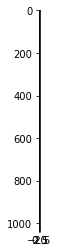

In [12]:
#Plot the first Image
plt.imshow(X_train[1,:,:])

In [13]:
# Our image is an array of pixels ranging from 0 to 255
X_train[1]

array([[241, 241, 241],
       [ 31,  31,  31],
       [  0,   0,   0],
       ...,
       [  0,   0,   0],
       [ 21,  21,  21],
       [233, 233, 233]], dtype=uint8)

### For Logistic Regression, we want to flatten our data into rows of 1D image arrays

In [14]:
X_train.shape

(767, 1022, 3)

# ## Scaling and Normalization

We use Sklearn's MinMaxScaler to normalize our data between 0 and 1

# Slide Type
One-Hot Encoding
We need to one-hot encode our integer labels using the to_categorical helper function

In [15]:
# Our Training and Testing labels are integer encoded from 0 to 9
y_train[:20]

['ISIC', 'ISIC', 'ISIC', 'ISIC', 'ISIC', 'ISIC', 'ISIC', 'ISIC']

In [16]:
X_train.shape[2]

3

# Building our Model
In this example, we are going to build a Deep Multi-Layer Perceptron model with 2 hidden layers.

In [21]:
# Create an empty sequential model
model = Sequential()
# We can also choose our activation function. `relu` is a common
model.add(Dense(100, activation='relu', input_dim=X_train.shape[2]))
#model.add(Dense(100, activation='relu'))# Add a second hidden layer
model.add(Dense(100, activation='relu'))

In [23]:
num_classes=1
model.add(Dense(num_classes, activation='softmax'))

# Compiling our Model

In [24]:
# Compile the model
model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=['accuracy'])
# We can summarize our model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               400       
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 10,601
Trainable params: 10,601
Non-trainable params: 0
_________________________________________________________________


# Compile and Train our Model¶
Now that we have our model architecture defined, we must compile the model using a loss function and optimizer. We can also specify additional training metrics such as accuracy.

In [25]:
# Use categorical crossentropy for categorical data and mean squared error for regression
# Hint: your output layer in this example is using software for logistic regression (categorical)
# If your output layer activation was `linear` then you may want to use `mse` for loss
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Finally, we train our model using our training data

Training consists of updating our weights using our optimizer and loss function. In this example, we choose 10 iterations (loops) of training that are called epochs.

We also choose to shuffle our training data and increase the detail printed out during each training cycle.


In [26]:
# Fit (train) the model
model.fit(
    X_train,
    y_train,
    epochs=10,
    shuffle=True,
    verbose=2
)

ValueError: Error when checking input: expected dense_4_input to have 2 dimensions, but got array with shape (767, 1022, 3)